# Binary Image Classification with CNN using ImageDataGenerator to prevent Overfitting 

We will build a Cats vs Dogs classifier using a basic Convolutional Neural Network architecture. 
We will focus on the use of **ImageDataGenerator** to help build a more robust model, even with less training data and while also avoiding overfitting.  

The dataset is obtained from a subset of Kaggle dataset titled 'Dogs & Cats Images', which can be found at the following link: 
https://www.kaggle.com/chetankv/dogs-cats-images

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model  
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.2.0


In [2]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])


model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [3]:
# Define our example directories and files
base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 50,
            validation_steps = 50,
            verbose = 1,)
#             callbacks=[callback])

Epoch 1/50
100/100 [==============================] - 12s 124ms/step - loss: 0.6879 - accuracy: 0.5310 - val_loss: 0.6699 - val_accuracy: 0.6060
Epoch 2/50
100/100 [==============================] - 12s 122ms/step - loss: 0.6477 - accuracy: 0.6085 - val_loss: 0.6317 - val_accuracy: 0.6110
Epoch 3/50
100/100 [==============================] - 12s 122ms/step - loss: 0.5945 - accuracy: 0.6890 - val_loss: 0.6279 - val_accuracy: 0.6190
Epoch 4/50
100/100 [==============================] - 12s 122ms/step - loss: 0.5625 - accuracy: 0.7030 - val_loss: 0.5868 - val_accuracy: 0.6910
Epoch 5/50
100/100 [==============================] - 12s 121ms/step - loss: 0.5339 - accuracy: 0.7390 - val_loss: 0.5705 - val_accuracy: 0.7070
Epoch 6/50
100/100 [==============================] - 12s 121ms/step - loss: 0.5126 - accuracy: 0.7525 - val_loss: 0.5675 - val_accuracy: 0.7180
Epoch 7/50
100/100 [==============================] - 12s 122ms/step - loss: 0.4821 - accuracy: 0.7705 - val_loss: 0.5746 - val_ac

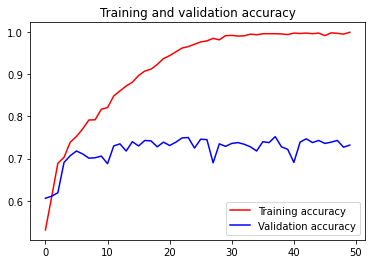

<Figure size 432x288 with 0 Axes>

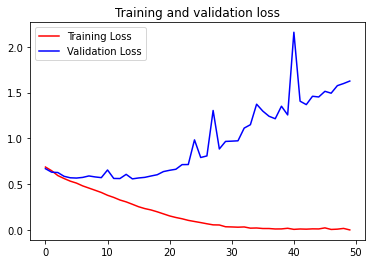

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

On running our model for 100 epochs, we can see that even though our training set accuracy is ~99%, the validation accuracy is only ~83%. This is a classic case of overfitting, wherein the model fits a little too well on the training set, but underperforms on images it hasn't seen before.

One way to reduce overfitting and improve validation accuracy is to train the model with a more diverse set of images. But we don't always have access to such data. In such scenarios, we can use ImageDataGenerator to augment our training dataset with modified images of the training set itself. Some of the properties include:
* **rotation_range** is a value in degrees (0–180), a range within which to randomly rotate pictures.
* **width_shift** and **height_shift** are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* **shear_range** is for randomly applying shearing transformations.
* **zoom_range** is for randomly zooming inside pictures.
* **horizontal_flip** is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* **fill_mode** is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

### Training with ImageDataGenerator

In [7]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])


print(model.summary())
print()

# Define our example directories and files
base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                   )

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [8]:
history2 = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 50,
            validation_steps = 50,
            verbose = 1)

Epoch 1/50
100/100 [==============================] - 17s 174ms/step - loss: 0.6900 - accuracy: 0.5320 - val_loss: 0.6682 - val_accuracy: 0.6070
Epoch 2/50
100/100 [==============================] - 17s 171ms/step - loss: 0.6795 - accuracy: 0.5670 - val_loss: 0.6545 - val_accuracy: 0.6180
Epoch 3/50
100/100 [==============================] - 17s 172ms/step - loss: 0.6615 - accuracy: 0.6080 - val_loss: 0.6266 - val_accuracy: 0.6280
Epoch 4/50
100/100 [==============================] - 17s 172ms/step - loss: 0.6410 - accuracy: 0.6165 - val_loss: 0.6058 - val_accuracy: 0.6750
Epoch 5/50
100/100 [==============================] - 17s 173ms/step - loss: 0.6225 - accuracy: 0.6595 - val_loss: 0.5931 - val_accuracy: 0.6560
Epoch 6/50
100/100 [==============================] - 17s 171ms/step - loss: 0.6139 - accuracy: 0.6630 - val_loss: 0.5747 - val_accuracy: 0.6940
Epoch 7/50
100/100 [==============================] - 17s 172ms/step - loss: 0.6128 - accuracy: 0.6645 - val_loss: 0.5852 - val_ac

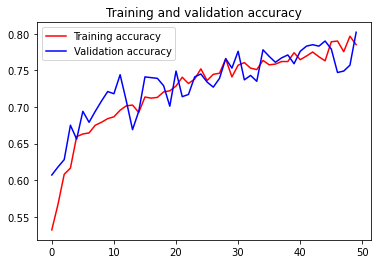

<Figure size 432x288 with 0 Axes>

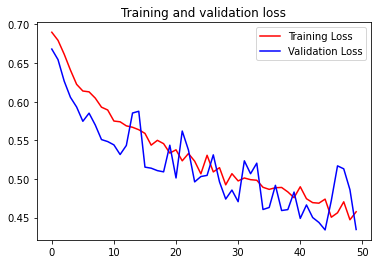

In [9]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The impact of using ImageDataGenerator can be seen clearly here. The validation accuracy now is very close to the training accuracy, as compared to the results earlier. 

Our new model fits better to unseen data than the previously trained model, with the validation accuracy at 80% as compared to 73% earlier!